# Measurement of the semileptonic $t\bar{t} + \gamma$ production cross section 

In this analysis, we will be measuring the cross section for the production of a pair of top quarks in the semileptonic final state. A top quark prominently decays into a W boson and a b quark. The event signature for this final state is the presence of a photon candidate and the decay products of a pair of top quarks, namely two jets from the hadronization of two b quarks, and the decay products of a pair of W bosons. In the semileptonic final state, one W boson decays leptonically into a electron or a muon, and a corresponding neutrino $\nu$, and the other W boson decays hadronically. The $t\bar{t}+\gamma$ cross section is measured in a fiducial kinematic region defined by the presence of exactly one charged lepton and corresponding neutrino, and at least three jets, and a photon within the selection requirements. 

<center> 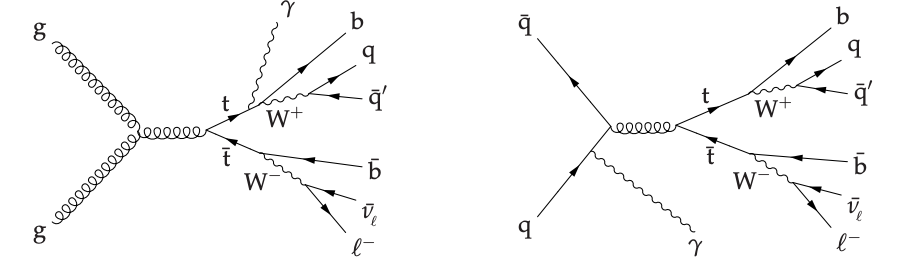 </center>

In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import hist
import coffea

# avoids warnings due to older NanoAOD tuples
NanoAODSchema.warn_missing_crossrefs = True

In [2]:
coffea.__version__

'2024.6.1'

In [3]:
fname = "root://cmseos.fnal.gov//store/user/cmsdas/2021/long_exercises/TTGamma/TestFiles/TTGamma_1l.root"
fileset = {
    fname: "Events"
}

events = NanoEventsFactory.from_root(
    file=fileset,
    schemaclass=NanoAODSchema,
    delayed=False,
    entry_stop=1000
).events()

/opt/conda/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:243: RuntimeWarning: Missing cross-reference index for Electron_genPartIdx => GenPart
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:243: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:243: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:243: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:243: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:243: RuntimeWarning: Missing cross

In [4]:
events.fields

['Flag',
 'LHEWeight',
 'run',
 'GenPart',
 'GenJet',
 'luminosityBlock',
 'LHEScaleWeight',
 'Generator',
 'MET',
 'GenMET',
 'fixedGridRhoFastjetAll',
 'event',
 'Pileup',
 'LHEPdfWeight',
 'Electron',
 'Jet',
 'Photon',
 'Muon',
 'PSWeight',
 'HLT']

In [18]:
events.Electron

<ElectronArray [[], [...], ..., [{dxy: -0.00144, ...}]] type='1000 * var * ...'>

In [21]:
events.Muon.fields

['eta',
 'mass',
 'pfRelIso04_all',
 'phi',
 'pt',
 'charge',
 'isGlobal',
 'isPFcand',
 'isTracker',
 'tightId']

In [26]:
events.Electron.cutBased > 0

<Array [[], [True, False], ..., [...], [False]] type='1000 * var * bool[par...'>

In [8]:
events.Photon.vidNestedWPBitmap.__doc__

'VID compressed bitmap (MinPtCut,PhoSCEtaMultiRangeCut,PhoSingleTowerHadOverEmCut,PhoFull5x5SigmaIEtaIEtaCut,PhoAnyPFIsoWithEACut,PhoAnyPFIsoWithEAAndQuadScalingCut,PhoAnyPFIsoWithEACut), 2 bits per cut'

In [4]:
from processor import select_muons

/opt/conda/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
